Peguei um dataset no kaggle sobre pessoas com e sem diabetes:https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset 
Usando as informações contidas no dataset pedi para o chat gpt formular 10 perguntas para treinar meus conhecimentos sobre python e analise de dados.

Questões:
1.Qual é a prevalência de diabetes, pré-diabetes e não diabetes no dataset?
2.Qual é a média do IMC (BMI) para cada grupo de diabetes?
3.Há uma correlação entre pressão alta (HighBP) e diabetes?
4.Como o nível de atividade física (PhysActivity) varia entre os grupos de diabetes?
5.A proporção de fumantes (Smoker) é maior entre os diabéticos em comparação com os não diabéticos?
6.Qual é a relação entre consumo de frutas (Fruits) e vegetais (Veggies) e a condição de diabetes?
7.Como a saúde geral (GenHlth) é percebida entre os diferentes grupos de diabetes?
8.Existe alguma relação entre educação (Education) e a condição de diabetes?
9.Como a renda (Income) afeta a prevalência de diabetes?
10.Há uma diferença significativa no número de dias de saúde mental ruim (MentHlth) entre os diferentes grupos de diabetes?


In [ ]:
verificar qual o perfil de pessoas com diabetes

In [36]:
import pandas as pd

# Carregar o dataset

df = pd.read_csv(r"C:\Users\luans\Workspace\projetos_pessoais\diabetes\diabetes_012_health_indicators_BRFSS2015.csv")

# Contar a prevalência* de cada grupo

prevalencia = df['Diabetes_012'].value_counts(normalize=True)*100
print(prevalencia)



Diabetes_012
0.0    84.241170
2.0    13.933302
1.0     1.825528
Name: proportion, dtype: float64


In [37]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


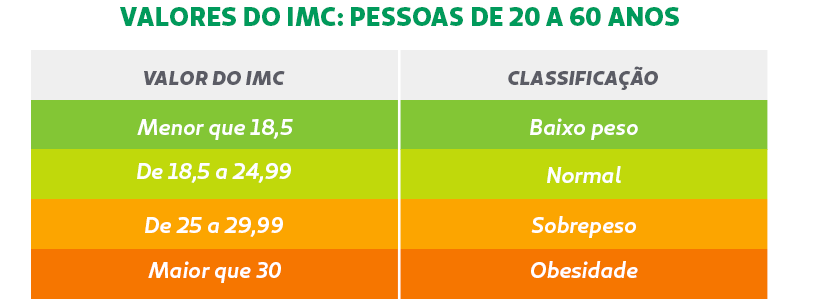

In [13]:
media_bmi = df.groupby('Diabetes_012')['BMI'].mean()
print(media_bmi)

Diabetes_012
0.0    27.742521
1.0    30.724466
2.0    31.944011
Name: BMI, dtype: float64


de acordo com a tabela e com o resultado parece que o imc está sim ligado com diabetes também temos como separar por grupos abaixo de 60 e acima de 60


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tabela de contigência para pressão alta e diabetes

contingency_table = pd.crosstab(df['HighBP'], df['Diabetes_012'])
print(contingency_table)

# Teste do qui-quadrado

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi_squared: {chi2}, p-value: {p}")

if p < 0.05:
    print("Rejeitamos a hipótese nula. Há uma associação significativa entre pressão alta e diabetes.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidência suficiente para afirmar que há uma associação entre pressão alta e diabetes.")


Diabetes_012     0.0   1.0    2.0
HighBP                           
0.0           134391  1718   8742
1.0            79312  2913  26604
Chi_squared: 18794.644052016425, p-value: 0.0
Rejeitamos a hipótese nula. Há uma associação significativa entre pressão alta e diabetes.


O teste do qui-quadrado (ou chi-quadrado) é um teste estatístico utilizado para determinar se há uma associação significativa entre duas variáveis categóricas. Ele compara a distribuição observada dos dados com a distribuição esperada se não houvesse associação entre as variáveis.

In [15]:
atividade_fisica = df.groupby('Diabetes_012')['PhysActivity'].mean()*100
print(atividade_fisica)

Diabetes_012
0.0    77.907657
1.0    67.847117
2.0    63.053811
Name: PhysActivity, dtype: float64


as pessoas sem diabetes também se exercitam mais do que as pré diabeticas e as diabéticas

In [16]:
consumo_frutas = df.groupby('Diabetes_012')['Fruits'].mean()*100
consumo_vegetais = df.groupby('Diabetes_012')['Veggies'].mean()*100
print("Consumo frutas:")
print(consumo_frutas)
print("Consumo vegetais:")
print(consumo_vegetais)

Consumo frutas:
Diabetes_012
0.0    64.302326
1.0    60.224574
2.0    58.544107
Name: Fruits, dtype: float64
Consumo vegetais:
Diabetes_012
0.0    82.143910
1.0    76.894839
2.0    75.640808
Name: Veggies, dtype: float64


no geral as pessoas desse grupo comem mais vegetais do que frutas, mas  no geral pessoas sem diabetes consumem mais frutas e vegetais

In [17]:
saude_geral = df.groupby('Diabetes_012')['GenHlth'].mean()
print(saude_geral)

Diabetes_012
0.0    2.372391
1.0    2.975599
2.0    3.290981
Name: GenHlth, dtype: float64


Entre pessoas com pré diabetes e pessoas com diabetes a média de como elas se sentem em relação a sua saude é bem parecida.

Você diria que sua saúde geral é em uma escala de 1 a 5 sendo 1 = exelente 2 = muito boa 3 = boa 4 = regular 5 = ruim)

In [18]:
educacao = df.groupby('Diabetes_012')['Education'].mean()
print(educacao)

Diabetes_012
0.0    5.106629
1.0    4.784496
2.0    4.745516
Name: Education, dtype: float64


Nivel educacional: escala de 1 a 6 1 = nunca foi a escola ou só no jardim de infancia 2 = Fundamental 1 3 = Fundamental 1 e 2 (um pouco do ensino médio) 4 = Se formou no ensino médio 5= fez 1 a 3 anos da faculdade 6 = 4 ou mais anos de faculdade

tem uma pequena diferença na média entre os grupos 0 1 e 2, acho que seria interessante nos aprofundarmos aqui mais para frente.

In [19]:
renda = df.groupby('Diabetes_012')['Income'].mean()
print(renda)

Diabetes_012
0.0    6.208663
1.0    5.351112
2.0    5.210094
Name: Income, dtype: float64


Renda escala de 1 a 8 sendo 1=menos de $10.000 ao ano 5 = menos de $35.000 ao ano e 8 = mais de $75.000 ou mais ao ano

novamente o grupo 0 parece receber em média mais do que o grupo 1 e grupo 2 isso também pode ser legal de ser investigado mais a fundo.

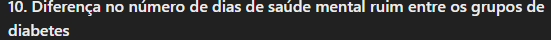

In [20]:
saude_mental = df.groupby('Diabetes_012')['MentHlth'].mean()
print(saude_mental)

Diabetes_012
0.0    2.944404
1.0    4.529907
2.0    4.461806
Name: MentHlth, dtype: float64


aqui vemos que as pessoas do grupo um e grupo 2 tem mais dias de saude mental ruim em média quando comparadas com o grupo 0, também é interessante ver mais sobre isso.

Decidi realizar algumas vizualizações com as informações obtidas usando o matplotlib e seaborn




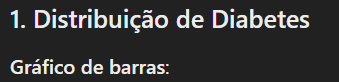

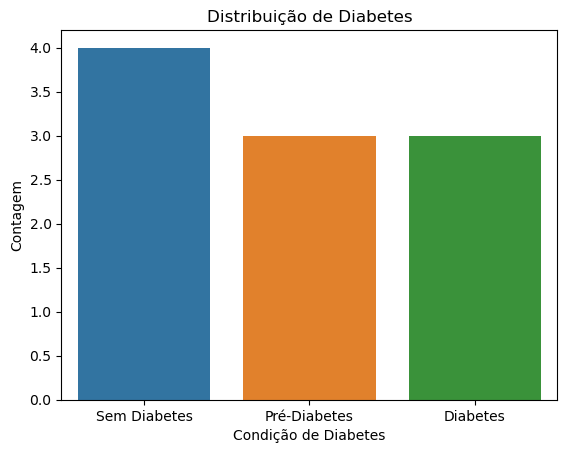

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Diabetes_012', data=df)
plt.title('Distribuição de Diabetes')
plt.xlabel('Condição de Diabetes')
plt.ylabel('Contagem')
plt.xticks(ticks=[0, 1, 2], labels=['Sem Diabetes', 'Pré-Diabetes', 'Diabetes'])
plt.show()

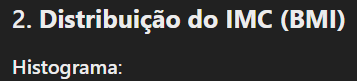

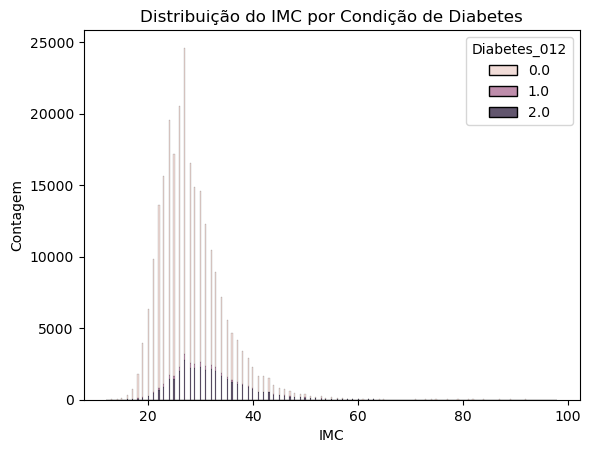

In [38]:
sns.histplot(data=df, x='BMI', hue='Diabetes_012', multiple='stack')
plt.title('Distribuição do IMC por Condição de Diabetes')
plt.xlabel('IMC')
plt.ylabel('Contagem')
plt.show()

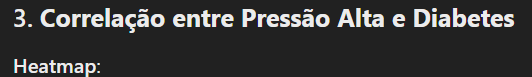

Exibir a matriz de correlação entre as várias variaveis.

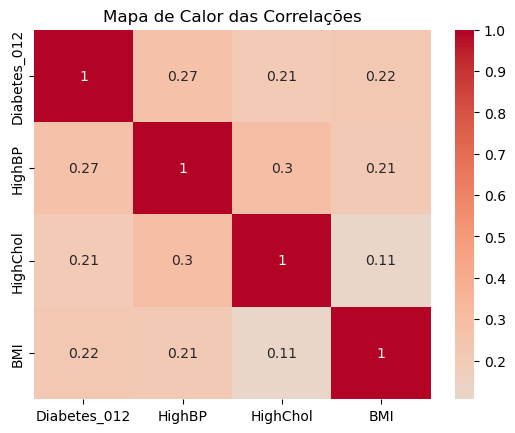

In [42]:
import numpy as np

corr = df[['Diabetes_012', 'HighBP', 'HighChol', 'BMI']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Mapa de Calor das Correlações')
plt.show()


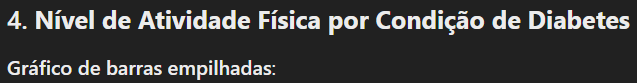

- Comparar a proporção de pessoas fisicamente ativas em cada grupo de diabetes.

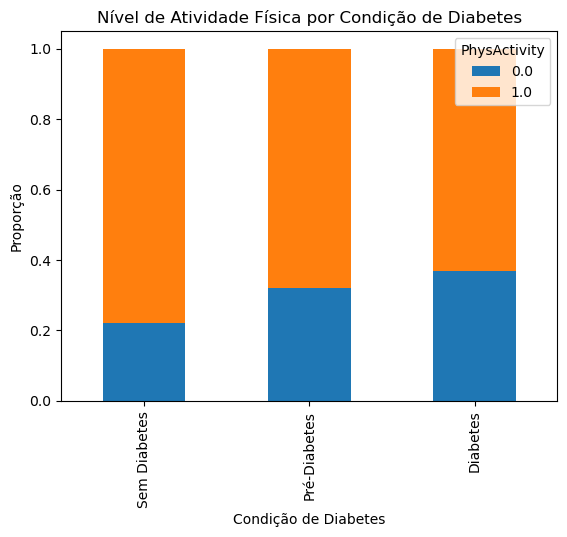

In [43]:
phys_activity = df.groupby('Diabetes_012')['PhysActivity'].value_counts(normalize=True).unstack()
phys_activity.plot(kind='bar', stacked=True)
plt.title('Nível de Atividade Física por Condição de Diabetes')
plt.xlabel('Condição de Diabetes')
plt.ylabel('Proporção')
plt.xticks(ticks=[0, 1, 2], labels=['Sem Diabetes', 'Pré-Diabetes', 'Diabetes'])
plt.show()

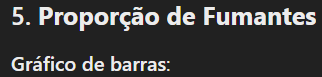

Visualizar a proporção de fumantes em cada grupo de diabetes.

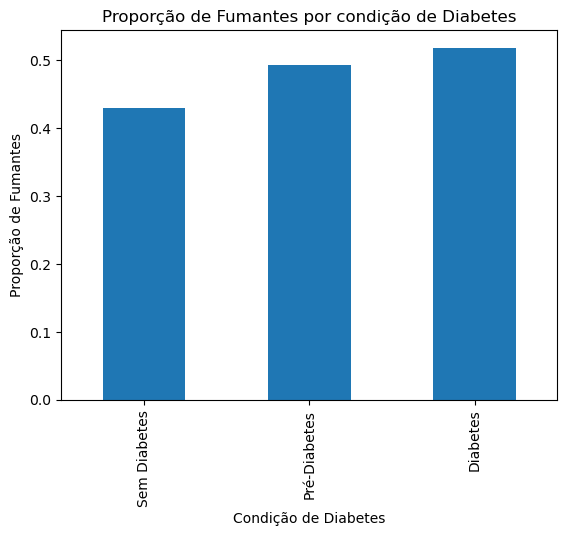

In [45]:
smokers = df.groupby('Diabetes_012')['Smoker'].mean()
smokers.plot(kind='bar')
plt.title('Proporção de Fumantes por condição de Diabetes')
plt.xlabel('Condição de Diabetes')
plt.ylabel('Proporção de Fumantes')
plt.xticks(ticks=[0, 1, 2], labels=['Sem Diabetes', 'Pré-Diabetes', 'Diabetes'])
plt.show()

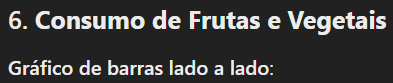

- Comparar o consumo de frutas e vegetais entre os grupos de diabetes.

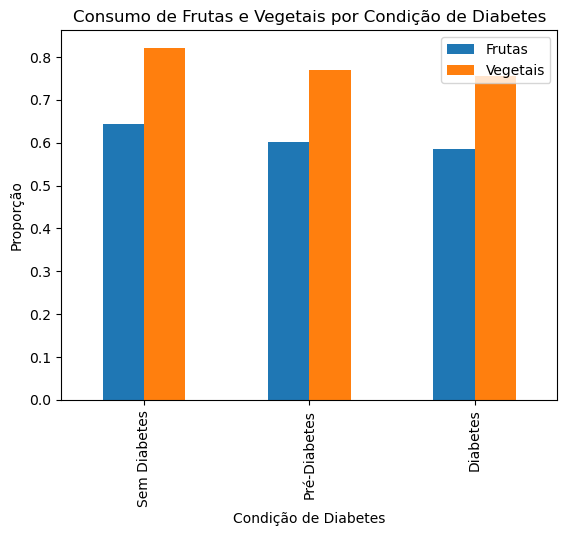

In [47]:
fruits_veggies = df.groupby('Diabetes_012')[['Fruits', 'Veggies']].mean()
fruits_veggies.plot(kind='bar')
plt.title('Consumo de Frutas e Vegetais por Condição de Diabetes')
plt.xlabel('Condição de Diabetes')
plt.ylabel('Proporção')
plt.xticks(ticks=[0, 1, 2], labels=['Sem Diabetes', 'Pré-Diabetes', 'Diabetes'])
plt.legend(['Frutas', 'Vegetais'])
plt.show()

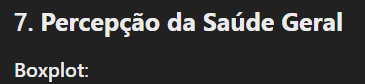

- Mostrar a distribuição da percepção de saúde geral (GenHlth) entre os grupos de diabetes.

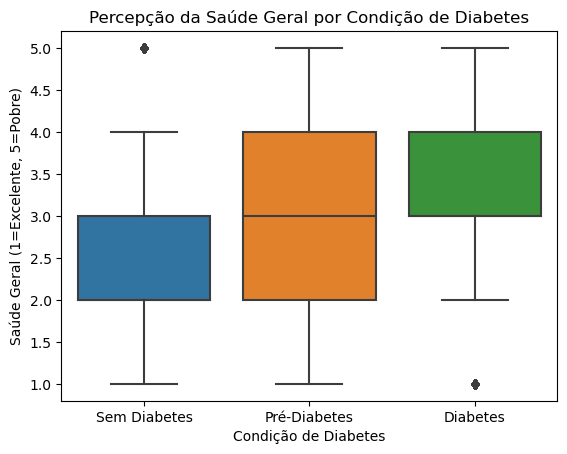

In [49]:
sns.boxplot(x='Diabetes_012', y='GenHlth', data=df)
plt.title('Percepção da Saúde Geral por Condição de Diabetes')
plt.xlabel('Condição de Diabetes')
plt.ylabel('Saúde Geral (1=Excelente, 5=Pobre)')
plt.xticks(ticks=[0, 1, 2], labels=['Sem Diabetes', 'Pré-Diabetes', 'Diabetes'])
plt.show()

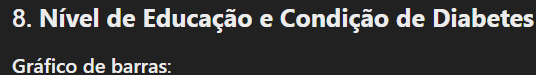

- Visualizar a média do nível de educação para cada grupo de diabetes.



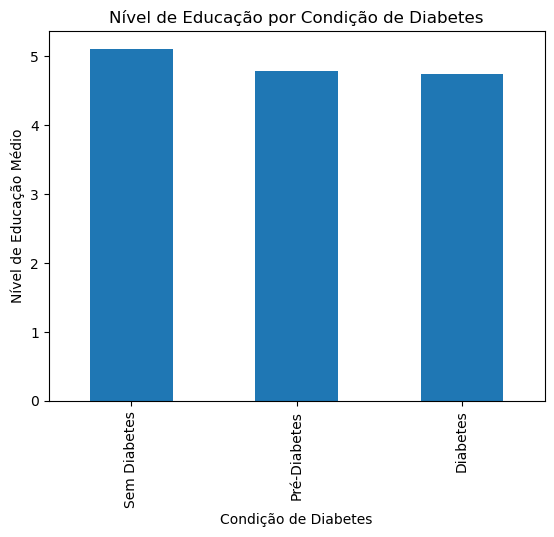

In [50]:
education = df.groupby('Diabetes_012')['Education'].mean()
education.plot(kind='bar')
plt.title('Nível de Educação por Condição de Diabetes')
plt.xlabel('Condição de Diabetes')
plt.ylabel('Nível de Educação Médio')
plt.xticks(ticks=[0, 1, 2], labels=['Sem Diabetes', 'Pré-Diabetes', 'Diabetes'])
plt.show()

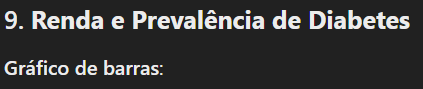

- Comparar a renda média entre os grupos de diabetes.

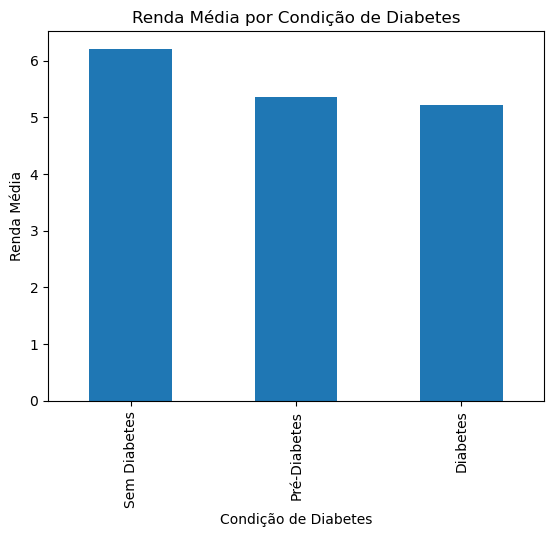

In [51]:
income = df.groupby('Diabetes_012')['Income'].mean()
income.plot(kind='bar')
plt.title('Renda Média por Condição de Diabetes')
plt.xlabel('Condição de Diabetes')
plt.ylabel('Renda Média')
plt.xticks(ticks=[0, 1, 2], labels=['Sem Diabetes', 'Pré-Diabetes', 'Diabetes'])
plt.show()

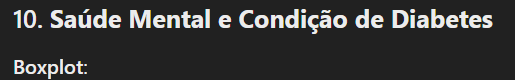


- Mostrar a distribuição do número de dias de saúde mental ruim (MentHlth) entre os grupos de diabetes.

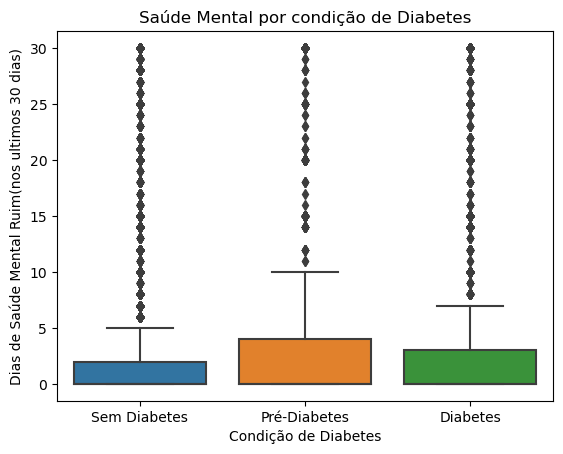

In [52]:
sns.boxplot(x='Diabetes_012', y='MentHlth', data=df)
plt.title('Saúde Mental por condição de Diabetes')
plt.xlabel('Condição de Diabetes')
plt.ylabel('Dias de Saúde Mental Ruim(nos ultimos 30 dias)')
plt.xticks(ticks=[0, 1, 2], labels=['Sem Diabetes', 'Pré-Diabetes', 'Diabetes'])
plt.show()